In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
%matplotlib inline

/home/vedant120299/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
sample_img = mnist.train.images[1024].reshape(28,28)

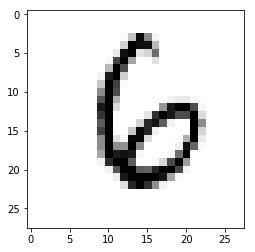

In [7]:
plt.imshow(sample_img, cmap='Greys')

In [8]:
## Multilayer perceptron parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [9]:
## set up Neural network parameters
n_classes = 10 ##Digits go from 0-9
n_samples = mnist.train.num_examples
n_input = 784
## Number of neurons per image(256x256)
n_hidden_1 = 256
n_hidden_2 = 256

In [10]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for Data Input
    weights: A dict of weights
    biases: A dict of biases
    '''
    
    ##First hidden layer with RELU(A simple activation function) Activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    ## (x * w + b) = RELU => f(x) = max(0, x) 
    layer_1 = tf.nn.relu(layer_1)
    
    ##Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    ##Final output layer and return it
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [11]:
##Set up weights and bias dicts
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [12]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

In [13]:
predictions = multilayer_perceptron(x, weights, biases)

In [14]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# Training the model

In [15]:
sess = tf.InteractiveSession()

In [16]:
init  = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [17]:
sess.run(init)

In [18]:
## 50 loops
for epoch in range(training_epochs):
    
    ## Cost
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        ##Grab each batch
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        ## Optimisation and Cost
        _,c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        
        ##Compute avg Cost
        avg_cost += c/total_batch
        
        print("Epoch: {} cost{:.4f}".format(epoch+1, avg_cost))
        print("Model has completed {} epochs of training.".format(training_epochs))
        

Epoch: 1 cost3.8590
Model has completed 15 epochs of training.
Epoch: 1 cost7.9035
Model has completed 15 epochs of training.
Epoch: 1 cost11.3972
Model has completed 15 epochs of training.
Epoch: 1 cost14.5385
Model has completed 15 epochs of training.
Epoch: 1 cost17.2961
Model has completed 15 epochs of training.
Epoch: 1 cost20.2493
Model has completed 15 epochs of training.
Epoch: 1 cost22.9362
Model has completed 15 epochs of training.
Epoch: 1 cost25.5958
Model has completed 15 epochs of training.
Epoch: 1 cost27.8069
Model has completed 15 epochs of training.
Epoch: 1 cost30.1828
Model has completed 15 epochs of training.
Epoch: 1 cost32.8074
Model has completed 15 epochs of training.
Epoch: 1 cost35.0192
Model has completed 15 epochs of training.
Epoch: 1 cost37.0993
Model has completed 15 epochs of training.
Epoch: 1 cost39.2301
Model has completed 15 epochs of training.
Epoch: 1 cost40.9048
Model has completed 15 epochs of training.
Epoch: 1 cost42.7093
Model has completed 1

Epoch: 1 cost118.8347
Model has completed 15 epochs of training.
Epoch: 1 cost119.1062
Model has completed 15 epochs of training.
Epoch: 1 cost119.3310
Model has completed 15 epochs of training.
Epoch: 1 cost119.5418
Model has completed 15 epochs of training.
Epoch: 1 cost119.8287
Model has completed 15 epochs of training.
Epoch: 1 cost120.1160
Model has completed 15 epochs of training.
Epoch: 1 cost120.4179
Model has completed 15 epochs of training.
Epoch: 1 cost120.6729
Model has completed 15 epochs of training.
Epoch: 1 cost121.0103
Model has completed 15 epochs of training.
Epoch: 1 cost121.3043
Model has completed 15 epochs of training.
Epoch: 1 cost121.5899
Model has completed 15 epochs of training.
Epoch: 1 cost121.7876
Model has completed 15 epochs of training.
Epoch: 1 cost122.0241
Model has completed 15 epochs of training.
Epoch: 1 cost122.2063
Model has completed 15 epochs of training.
Epoch: 1 cost122.4014
Model has completed 15 epochs of training.
Epoch: 1 cost122.6249
Mod

Epoch: 1 cost147.8621
Model has completed 15 epochs of training.
Epoch: 1 cost148.0266
Model has completed 15 epochs of training.
Epoch: 1 cost148.1346
Model has completed 15 epochs of training.
Epoch: 1 cost148.3721
Model has completed 15 epochs of training.
Epoch: 1 cost148.5343
Model has completed 15 epochs of training.
Epoch: 1 cost148.7437
Model has completed 15 epochs of training.
Epoch: 1 cost148.8909
Model has completed 15 epochs of training.
Epoch: 1 cost149.0255
Model has completed 15 epochs of training.
Epoch: 1 cost149.2622
Model has completed 15 epochs of training.
Epoch: 1 cost149.4145
Model has completed 15 epochs of training.
Epoch: 1 cost149.5472
Model has completed 15 epochs of training.
Epoch: 1 cost149.7542
Model has completed 15 epochs of training.
Epoch: 1 cost149.9581
Model has completed 15 epochs of training.
Epoch: 1 cost150.1572
Model has completed 15 epochs of training.
Epoch: 1 cost150.2754
Model has completed 15 epochs of training.
Epoch: 1 cost150.4256
Mod

Epoch: 1 cost168.1964
Model has completed 15 epochs of training.
Epoch: 1 cost168.3043
Model has completed 15 epochs of training.
Epoch: 1 cost168.3728
Model has completed 15 epochs of training.
Epoch: 1 cost168.4874
Model has completed 15 epochs of training.
Epoch: 1 cost168.6226
Model has completed 15 epochs of training.
Epoch: 1 cost168.7122
Model has completed 15 epochs of training.
Epoch: 1 cost168.8268
Model has completed 15 epochs of training.
Epoch: 1 cost168.9310
Model has completed 15 epochs of training.
Epoch: 1 cost168.9944
Model has completed 15 epochs of training.
Epoch: 1 cost169.1363
Model has completed 15 epochs of training.
Epoch: 1 cost169.2733
Model has completed 15 epochs of training.
Epoch: 1 cost169.3463
Model has completed 15 epochs of training.
Epoch: 1 cost169.4849
Model has completed 15 epochs of training.
Epoch: 1 cost169.5811
Model has completed 15 epochs of training.
Epoch: 1 cost169.6781
Model has completed 15 epochs of training.
Epoch: 1 cost169.8027
Mod

Epoch: 2 cost0.0863
Model has completed 15 epochs of training.
Epoch: 2 cost0.1518
Model has completed 15 epochs of training.
Epoch: 2 cost0.2035
Model has completed 15 epochs of training.
Epoch: 2 cost0.2784
Model has completed 15 epochs of training.
Epoch: 2 cost0.2984
Model has completed 15 epochs of training.
Epoch: 2 cost0.3582
Model has completed 15 epochs of training.
Epoch: 2 cost0.4525
Model has completed 15 epochs of training.
Epoch: 2 cost0.4904
Model has completed 15 epochs of training.
Epoch: 2 cost0.5886
Model has completed 15 epochs of training.
Epoch: 2 cost0.7533
Model has completed 15 epochs of training.
Epoch: 2 cost0.8486
Model has completed 15 epochs of training.
Epoch: 2 cost1.0028
Model has completed 15 epochs of training.
Epoch: 2 cost1.0745
Model has completed 15 epochs of training.
Epoch: 2 cost1.1880
Model has completed 15 epochs of training.
Epoch: 2 cost1.3213
Model has completed 15 epochs of training.
Epoch: 2 cost1.3989
Model has completed 15 epochs of tr

Epoch: 2 cost12.3280
Model has completed 15 epochs of training.
Epoch: 2 cost12.3766
Model has completed 15 epochs of training.
Epoch: 2 cost12.4900
Model has completed 15 epochs of training.
Epoch: 2 cost12.5928
Model has completed 15 epochs of training.
Epoch: 2 cost12.6498
Model has completed 15 epochs of training.
Epoch: 2 cost12.7186
Model has completed 15 epochs of training.
Epoch: 2 cost12.8031
Model has completed 15 epochs of training.
Epoch: 2 cost12.8507
Model has completed 15 epochs of training.
Epoch: 2 cost12.9217
Model has completed 15 epochs of training.
Epoch: 2 cost13.0108
Model has completed 15 epochs of training.
Epoch: 2 cost13.1471
Model has completed 15 epochs of training.
Epoch: 2 cost13.2327
Model has completed 15 epochs of training.
Epoch: 2 cost13.3278
Model has completed 15 epochs of training.
Epoch: 2 cost13.4517
Model has completed 15 epochs of training.
Epoch: 2 cost13.5418
Model has completed 15 epochs of training.
Epoch: 2 cost13.6213
Model has completed

Epoch: 2 cost23.4197
Model has completed 15 epochs of training.
Epoch: 2 cost23.5242
Model has completed 15 epochs of training.
Epoch: 2 cost23.5909
Model has completed 15 epochs of training.
Epoch: 2 cost23.6701
Model has completed 15 epochs of training.
Epoch: 2 cost23.7532
Model has completed 15 epochs of training.
Epoch: 2 cost23.7849
Model has completed 15 epochs of training.
Epoch: 2 cost23.8509
Model has completed 15 epochs of training.
Epoch: 2 cost23.9118
Model has completed 15 epochs of training.
Epoch: 2 cost23.9936
Model has completed 15 epochs of training.
Epoch: 2 cost24.0595
Model has completed 15 epochs of training.
Epoch: 2 cost24.1180
Model has completed 15 epochs of training.
Epoch: 2 cost24.1840
Model has completed 15 epochs of training.
Epoch: 2 cost24.2956
Model has completed 15 epochs of training.
Epoch: 2 cost24.3727
Model has completed 15 epochs of training.
Epoch: 2 cost24.4904
Model has completed 15 epochs of training.
Epoch: 2 cost24.5390
Model has completed

Epoch: 2 cost34.6354
Model has completed 15 epochs of training.
Epoch: 2 cost34.7102
Model has completed 15 epochs of training.
Epoch: 2 cost34.7582
Model has completed 15 epochs of training.
Epoch: 2 cost34.8541
Model has completed 15 epochs of training.
Epoch: 2 cost34.9112
Model has completed 15 epochs of training.
Epoch: 2 cost34.9832
Model has completed 15 epochs of training.
Epoch: 2 cost35.0661
Model has completed 15 epochs of training.
Epoch: 2 cost35.1354
Model has completed 15 epochs of training.
Epoch: 2 cost35.1840
Model has completed 15 epochs of training.
Epoch: 2 cost35.2059
Model has completed 15 epochs of training.
Epoch: 2 cost35.2714
Model has completed 15 epochs of training.
Epoch: 2 cost35.3439
Model has completed 15 epochs of training.
Epoch: 2 cost35.4455
Model has completed 15 epochs of training.
Epoch: 2 cost35.5374
Model has completed 15 epochs of training.
Epoch: 2 cost35.6183
Model has completed 15 epochs of training.
Epoch: 2 cost35.6648
Model has completed

Epoch: 3 cost1.0061
Model has completed 15 epochs of training.
Epoch: 3 cost1.0384
Model has completed 15 epochs of training.
Epoch: 3 cost1.0786
Model has completed 15 epochs of training.
Epoch: 3 cost1.0948
Model has completed 15 epochs of training.
Epoch: 3 cost1.1421
Model has completed 15 epochs of training.
Epoch: 3 cost1.1801
Model has completed 15 epochs of training.
Epoch: 3 cost1.2536
Model has completed 15 epochs of training.
Epoch: 3 cost1.3415
Model has completed 15 epochs of training.
Epoch: 3 cost1.4218
Model has completed 15 epochs of training.
Epoch: 3 cost1.4426
Model has completed 15 epochs of training.
Epoch: 3 cost1.4991
Model has completed 15 epochs of training.
Epoch: 3 cost1.5404
Model has completed 15 epochs of training.
Epoch: 3 cost1.6019
Model has completed 15 epochs of training.
Epoch: 3 cost1.6750
Model has completed 15 epochs of training.
Epoch: 3 cost1.7365
Model has completed 15 epochs of training.
Epoch: 3 cost1.7941
Model has completed 15 epochs of tr

Epoch: 3 cost8.2151
Model has completed 15 epochs of training.
Epoch: 3 cost8.2304
Model has completed 15 epochs of training.
Epoch: 3 cost8.2672
Model has completed 15 epochs of training.
Epoch: 3 cost8.3081
Model has completed 15 epochs of training.
Epoch: 3 cost8.3569
Model has completed 15 epochs of training.
Epoch: 3 cost8.4422
Model has completed 15 epochs of training.
Epoch: 3 cost8.5458
Model has completed 15 epochs of training.
Epoch: 3 cost8.5902
Model has completed 15 epochs of training.
Epoch: 3 cost8.6148
Model has completed 15 epochs of training.
Epoch: 3 cost8.7262
Model has completed 15 epochs of training.
Epoch: 3 cost8.7653
Model has completed 15 epochs of training.
Epoch: 3 cost8.7986
Model has completed 15 epochs of training.
Epoch: 3 cost8.8422
Model has completed 15 epochs of training.
Epoch: 3 cost8.8840
Model has completed 15 epochs of training.
Epoch: 3 cost8.9303
Model has completed 15 epochs of training.
Epoch: 3 cost8.9908
Model has completed 15 epochs of tr

Epoch: 3 cost14.8986
Model has completed 15 epochs of training.
Epoch: 3 cost14.9474
Model has completed 15 epochs of training.
Epoch: 3 cost15.0071
Model has completed 15 epochs of training.
Epoch: 3 cost15.0531
Model has completed 15 epochs of training.
Epoch: 3 cost15.0744
Model has completed 15 epochs of training.
Epoch: 3 cost15.1457
Model has completed 15 epochs of training.
Epoch: 3 cost15.2077
Model has completed 15 epochs of training.
Epoch: 3 cost15.2644
Model has completed 15 epochs of training.
Epoch: 3 cost15.3274
Model has completed 15 epochs of training.
Epoch: 3 cost15.3651
Model has completed 15 epochs of training.
Epoch: 3 cost15.4181
Model has completed 15 epochs of training.
Epoch: 3 cost15.4757
Model has completed 15 epochs of training.
Epoch: 3 cost15.5143
Model has completed 15 epochs of training.
Epoch: 3 cost15.6262
Model has completed 15 epochs of training.
Epoch: 3 cost15.6388
Model has completed 15 epochs of training.
Epoch: 3 cost15.7225
Model has completed

Epoch: 3 cost21.6951
Model has completed 15 epochs of training.
Epoch: 3 cost21.7728
Model has completed 15 epochs of training.
Epoch: 3 cost21.8408
Model has completed 15 epochs of training.
Epoch: 3 cost21.9052
Model has completed 15 epochs of training.
Epoch: 3 cost21.9404
Model has completed 15 epochs of training.
Epoch: 3 cost22.0066
Model has completed 15 epochs of training.
Epoch: 3 cost22.0537
Model has completed 15 epochs of training.
Epoch: 3 cost22.0877
Model has completed 15 epochs of training.
Epoch: 3 cost22.1170
Model has completed 15 epochs of training.
Epoch: 3 cost22.1581
Model has completed 15 epochs of training.
Epoch: 3 cost22.1722
Model has completed 15 epochs of training.
Epoch: 3 cost22.2328
Model has completed 15 epochs of training.
Epoch: 3 cost22.3056
Model has completed 15 epochs of training.
Epoch: 3 cost22.3280
Model has completed 15 epochs of training.
Epoch: 3 cost22.3671
Model has completed 15 epochs of training.
Epoch: 3 cost22.4180
Model has completed

Epoch: 4 cost1.3985
Model has completed 15 epochs of training.
Epoch: 4 cost1.4081
Model has completed 15 epochs of training.
Epoch: 4 cost1.4384
Model has completed 15 epochs of training.
Epoch: 4 cost1.4732
Model has completed 15 epochs of training.
Epoch: 4 cost1.4935
Model has completed 15 epochs of training.
Epoch: 4 cost1.5330
Model has completed 15 epochs of training.
Epoch: 4 cost1.5533
Model has completed 15 epochs of training.
Epoch: 4 cost1.6053
Model has completed 15 epochs of training.
Epoch: 4 cost1.6296
Model has completed 15 epochs of training.
Epoch: 4 cost1.6596
Model has completed 15 epochs of training.
Epoch: 4 cost1.6919
Model has completed 15 epochs of training.
Epoch: 4 cost1.7669
Model has completed 15 epochs of training.
Epoch: 4 cost1.7907
Model has completed 15 epochs of training.
Epoch: 4 cost1.8118
Model has completed 15 epochs of training.
Epoch: 4 cost1.8391
Model has completed 15 epochs of training.
Epoch: 4 cost1.8763
Model has completed 15 epochs of tr

Epoch: 4 cost6.2253
Model has completed 15 epochs of training.
Epoch: 4 cost6.2690
Model has completed 15 epochs of training.
Epoch: 4 cost6.2935
Model has completed 15 epochs of training.
Epoch: 4 cost6.3121
Model has completed 15 epochs of training.
Epoch: 4 cost6.3590
Model has completed 15 epochs of training.
Epoch: 4 cost6.3666
Model has completed 15 epochs of training.
Epoch: 4 cost6.4122
Model has completed 15 epochs of training.
Epoch: 4 cost6.4573
Model has completed 15 epochs of training.
Epoch: 4 cost6.5172
Model has completed 15 epochs of training.
Epoch: 4 cost6.5325
Model has completed 15 epochs of training.
Epoch: 4 cost6.5841
Model has completed 15 epochs of training.
Epoch: 4 cost6.6122
Model has completed 15 epochs of training.
Epoch: 4 cost6.6356
Model has completed 15 epochs of training.
Epoch: 4 cost6.6546
Model has completed 15 epochs of training.
Epoch: 4 cost6.6800
Model has completed 15 epochs of training.
Epoch: 4 cost6.7484
Model has completed 15 epochs of tr

Epoch: 4 cost11.1883
Model has completed 15 epochs of training.
Epoch: 4 cost11.2311
Model has completed 15 epochs of training.
Epoch: 4 cost11.2640
Model has completed 15 epochs of training.
Epoch: 4 cost11.2961
Model has completed 15 epochs of training.
Epoch: 4 cost11.3500
Model has completed 15 epochs of training.
Epoch: 4 cost11.4084
Model has completed 15 epochs of training.
Epoch: 4 cost11.4352
Model has completed 15 epochs of training.
Epoch: 4 cost11.4511
Model has completed 15 epochs of training.
Epoch: 4 cost11.5151
Model has completed 15 epochs of training.
Epoch: 4 cost11.5656
Model has completed 15 epochs of training.
Epoch: 4 cost11.5929
Model has completed 15 epochs of training.
Epoch: 4 cost11.6112
Model has completed 15 epochs of training.
Epoch: 4 cost11.6839
Model has completed 15 epochs of training.
Epoch: 4 cost11.7180
Model has completed 15 epochs of training.
Epoch: 4 cost11.7342
Model has completed 15 epochs of training.
Epoch: 4 cost11.7695
Model has completed

Epoch: 4 cost15.6943
Model has completed 15 epochs of training.
Epoch: 4 cost15.7730
Model has completed 15 epochs of training.
Epoch: 4 cost15.7974
Model has completed 15 epochs of training.
Epoch: 4 cost15.8042
Model has completed 15 epochs of training.
Epoch: 4 cost15.8353
Model has completed 15 epochs of training.
Epoch: 4 cost15.8859
Model has completed 15 epochs of training.
Epoch: 4 cost15.9338
Model has completed 15 epochs of training.
Epoch: 4 cost15.9490
Model has completed 15 epochs of training.
Epoch: 4 cost15.9672
Model has completed 15 epochs of training.
Epoch: 4 cost16.0020
Model has completed 15 epochs of training.
Epoch: 4 cost16.0392
Model has completed 15 epochs of training.
Epoch: 4 cost16.0954
Model has completed 15 epochs of training.
Epoch: 4 cost16.1226
Model has completed 15 epochs of training.
Epoch: 4 cost16.1408
Model has completed 15 epochs of training.
Epoch: 4 cost16.1748
Model has completed 15 epochs of training.
Epoch: 4 cost16.1831
Model has completed

Epoch: 5 cost1.3677
Model has completed 15 epochs of training.
Epoch: 5 cost1.4016
Model has completed 15 epochs of training.
Epoch: 5 cost1.4294
Model has completed 15 epochs of training.
Epoch: 5 cost1.5025
Model has completed 15 epochs of training.
Epoch: 5 cost1.5371
Model has completed 15 epochs of training.
Epoch: 5 cost1.5868
Model has completed 15 epochs of training.
Epoch: 5 cost1.5930
Model has completed 15 epochs of training.
Epoch: 5 cost1.6283
Model has completed 15 epochs of training.
Epoch: 5 cost1.6705
Model has completed 15 epochs of training.
Epoch: 5 cost1.6823
Model has completed 15 epochs of training.
Epoch: 5 cost1.6969
Model has completed 15 epochs of training.
Epoch: 5 cost1.7452
Model has completed 15 epochs of training.
Epoch: 5 cost1.7558
Model has completed 15 epochs of training.
Epoch: 5 cost1.7707
Model has completed 15 epochs of training.
Epoch: 5 cost1.7832
Model has completed 15 epochs of training.
Epoch: 5 cost1.7986
Model has completed 15 epochs of tr

Epoch: 5 cost5.3378
Model has completed 15 epochs of training.
Epoch: 5 cost5.3780
Model has completed 15 epochs of training.
Epoch: 5 cost5.3936
Model has completed 15 epochs of training.
Epoch: 5 cost5.4480
Model has completed 15 epochs of training.
Epoch: 5 cost5.4722
Model has completed 15 epochs of training.
Epoch: 5 cost5.4964
Model has completed 15 epochs of training.
Epoch: 5 cost5.5191
Model has completed 15 epochs of training.
Epoch: 5 cost5.5596
Model has completed 15 epochs of training.
Epoch: 5 cost5.5662
Model has completed 15 epochs of training.
Epoch: 5 cost5.5819
Model has completed 15 epochs of training.
Epoch: 5 cost5.6128
Model has completed 15 epochs of training.
Epoch: 5 cost5.6147
Model has completed 15 epochs of training.
Epoch: 5 cost5.6460
Model has completed 15 epochs of training.
Epoch: 5 cost5.6613
Model has completed 15 epochs of training.
Epoch: 5 cost5.6739
Model has completed 15 epochs of training.
Epoch: 5 cost5.6908
Model has completed 15 epochs of tr

Epoch: 5 cost8.7252
Model has completed 15 epochs of training.
Epoch: 5 cost8.7408
Model has completed 15 epochs of training.
Epoch: 5 cost8.7546
Model has completed 15 epochs of training.
Epoch: 5 cost8.7876
Model has completed 15 epochs of training.
Epoch: 5 cost8.8033
Model has completed 15 epochs of training.
Epoch: 5 cost8.8155
Model has completed 15 epochs of training.
Epoch: 5 cost8.8477
Model has completed 15 epochs of training.
Epoch: 5 cost8.8764
Model has completed 15 epochs of training.
Epoch: 5 cost8.8885
Model has completed 15 epochs of training.
Epoch: 5 cost8.9047
Model has completed 15 epochs of training.
Epoch: 5 cost8.9107
Model has completed 15 epochs of training.
Epoch: 5 cost8.9137
Model has completed 15 epochs of training.
Epoch: 5 cost8.9288
Model has completed 15 epochs of training.
Epoch: 5 cost8.9697
Model has completed 15 epochs of training.
Epoch: 5 cost8.9929
Model has completed 15 epochs of training.
Epoch: 5 cost9.0091
Model has completed 15 epochs of tr

Epoch: 5 cost12.4018
Model has completed 15 epochs of training.
Epoch: 5 cost12.4294
Model has completed 15 epochs of training.
Epoch: 5 cost12.4611
Model has completed 15 epochs of training.
Epoch: 5 cost12.4773
Model has completed 15 epochs of training.
Epoch: 5 cost12.5001
Model has completed 15 epochs of training.
Epoch: 5 cost12.5166
Model has completed 15 epochs of training.
Epoch: 5 cost12.5570
Model has completed 15 epochs of training.
Epoch: 5 cost12.5699
Model has completed 15 epochs of training.
Epoch: 5 cost12.6073
Model has completed 15 epochs of training.
Epoch: 5 cost12.6155
Model has completed 15 epochs of training.
Epoch: 5 cost12.6288
Model has completed 15 epochs of training.
Epoch: 5 cost12.6490
Model has completed 15 epochs of training.
Epoch: 5 cost12.6612
Model has completed 15 epochs of training.
Epoch: 5 cost12.6773
Model has completed 15 epochs of training.
Epoch: 5 cost12.6856
Model has completed 15 epochs of training.
Epoch: 5 cost12.6970
Model has completed

Epoch: 6 cost1.8474
Model has completed 15 epochs of training.
Epoch: 6 cost1.8740
Model has completed 15 epochs of training.
Epoch: 6 cost1.9073
Model has completed 15 epochs of training.
Epoch: 6 cost1.9299
Model has completed 15 epochs of training.
Epoch: 6 cost1.9585
Model has completed 15 epochs of training.
Epoch: 6 cost1.9653
Model has completed 15 epochs of training.
Epoch: 6 cost1.9858
Model has completed 15 epochs of training.
Epoch: 6 cost2.0075
Model has completed 15 epochs of training.
Epoch: 6 cost2.0249
Model has completed 15 epochs of training.
Epoch: 6 cost2.0573
Model has completed 15 epochs of training.
Epoch: 6 cost2.0817
Model has completed 15 epochs of training.
Epoch: 6 cost2.0991
Model has completed 15 epochs of training.
Epoch: 6 cost2.1021
Model has completed 15 epochs of training.
Epoch: 6 cost2.1263
Model has completed 15 epochs of training.
Epoch: 6 cost2.1535
Model has completed 15 epochs of training.
Epoch: 6 cost2.1701
Model has completed 15 epochs of tr

Epoch: 6 cost4.5512
Model has completed 15 epochs of training.
Epoch: 6 cost4.5726
Model has completed 15 epochs of training.
Epoch: 6 cost4.5852
Model has completed 15 epochs of training.
Epoch: 6 cost4.6045
Model has completed 15 epochs of training.
Epoch: 6 cost4.6149
Model has completed 15 epochs of training.
Epoch: 6 cost4.6265
Model has completed 15 epochs of training.
Epoch: 6 cost4.6265
Model has completed 15 epochs of training.
Epoch: 6 cost4.6631
Model has completed 15 epochs of training.
Epoch: 6 cost4.6757
Model has completed 15 epochs of training.
Epoch: 6 cost4.6885
Model has completed 15 epochs of training.
Epoch: 6 cost4.7092
Model has completed 15 epochs of training.
Epoch: 6 cost4.7357
Model has completed 15 epochs of training.
Epoch: 6 cost4.7570
Model has completed 15 epochs of training.
Epoch: 6 cost4.7629
Model has completed 15 epochs of training.
Epoch: 6 cost4.7736
Model has completed 15 epochs of training.
Epoch: 6 cost4.8022
Model has completed 15 epochs of tr

Epoch: 6 cost7.0470
Model has completed 15 epochs of training.
Epoch: 6 cost7.0619
Model has completed 15 epochs of training.
Epoch: 6 cost7.0831
Model has completed 15 epochs of training.
Epoch: 6 cost7.0999
Model has completed 15 epochs of training.
Epoch: 6 cost7.1068
Model has completed 15 epochs of training.
Epoch: 6 cost7.1113
Model has completed 15 epochs of training.
Epoch: 6 cost7.1190
Model has completed 15 epochs of training.
Epoch: 6 cost7.1266
Model has completed 15 epochs of training.
Epoch: 6 cost7.1539
Model has completed 15 epochs of training.
Epoch: 6 cost7.1681
Model has completed 15 epochs of training.
Epoch: 6 cost7.1685
Model has completed 15 epochs of training.
Epoch: 6 cost7.1808
Model has completed 15 epochs of training.
Epoch: 6 cost7.1818
Model has completed 15 epochs of training.
Epoch: 6 cost7.1917
Model has completed 15 epochs of training.
Epoch: 6 cost7.1953
Model has completed 15 epochs of training.
Epoch: 6 cost7.2149
Model has completed 15 epochs of tr

Epoch: 6 cost9.3621
Model has completed 15 epochs of training.
Epoch: 6 cost9.3788
Model has completed 15 epochs of training.
Epoch: 6 cost9.4178
Model has completed 15 epochs of training.
Epoch: 6 cost9.4282
Model has completed 15 epochs of training.
Epoch: 6 cost9.4513
Model has completed 15 epochs of training.
Epoch: 6 cost9.4668
Model has completed 15 epochs of training.
Epoch: 6 cost9.4768
Model has completed 15 epochs of training.
Epoch: 6 cost9.5093
Model has completed 15 epochs of training.
Epoch: 6 cost9.5211
Model has completed 15 epochs of training.
Epoch: 6 cost9.5430
Model has completed 15 epochs of training.
Epoch: 6 cost9.5480
Model has completed 15 epochs of training.
Epoch: 6 cost9.5698
Model has completed 15 epochs of training.
Epoch: 6 cost9.5791
Model has completed 15 epochs of training.
Epoch: 6 cost9.5936
Model has completed 15 epochs of training.
Epoch: 6 cost9.6115
Model has completed 15 epochs of training.
Epoch: 6 cost9.6233
Model has completed 15 epochs of tr

Epoch: 7 cost1.2079
Model has completed 15 epochs of training.
Epoch: 7 cost1.2119
Model has completed 15 epochs of training.
Epoch: 7 cost1.2328
Model has completed 15 epochs of training.
Epoch: 7 cost1.2330
Model has completed 15 epochs of training.
Epoch: 7 cost1.2390
Model has completed 15 epochs of training.
Epoch: 7 cost1.2566
Model has completed 15 epochs of training.
Epoch: 7 cost1.2707
Model has completed 15 epochs of training.
Epoch: 7 cost1.2717
Model has completed 15 epochs of training.
Epoch: 7 cost1.2854
Model has completed 15 epochs of training.
Epoch: 7 cost1.3041
Model has completed 15 epochs of training.
Epoch: 7 cost1.3108
Model has completed 15 epochs of training.
Epoch: 7 cost1.3137
Model has completed 15 epochs of training.
Epoch: 7 cost1.3220
Model has completed 15 epochs of training.
Epoch: 7 cost1.3359
Model has completed 15 epochs of training.
Epoch: 7 cost1.3651
Model has completed 15 epochs of training.
Epoch: 7 cost1.3737
Model has completed 15 epochs of tr

Epoch: 7 cost2.9252
Model has completed 15 epochs of training.
Epoch: 7 cost2.9544
Model has completed 15 epochs of training.
Epoch: 7 cost2.9817
Model has completed 15 epochs of training.
Epoch: 7 cost2.9879
Model has completed 15 epochs of training.
Epoch: 7 cost3.0139
Model has completed 15 epochs of training.
Epoch: 7 cost3.0436
Model has completed 15 epochs of training.
Epoch: 7 cost3.0500
Model has completed 15 epochs of training.
Epoch: 7 cost3.0707
Model has completed 15 epochs of training.
Epoch: 7 cost3.0853
Model has completed 15 epochs of training.
Epoch: 7 cost3.0944
Model has completed 15 epochs of training.
Epoch: 7 cost3.0980
Model has completed 15 epochs of training.
Epoch: 7 cost3.1051
Model has completed 15 epochs of training.
Epoch: 7 cost3.1163
Model has completed 15 epochs of training.
Epoch: 7 cost3.1310
Model has completed 15 epochs of training.
Epoch: 7 cost3.1393
Model has completed 15 epochs of training.
Epoch: 7 cost3.1435
Model has completed 15 epochs of tr

Epoch: 7 cost5.0718
Model has completed 15 epochs of training.
Epoch: 7 cost5.0749
Model has completed 15 epochs of training.
Epoch: 7 cost5.0888
Model has completed 15 epochs of training.
Epoch: 7 cost5.0932
Model has completed 15 epochs of training.
Epoch: 7 cost5.0932
Model has completed 15 epochs of training.
Epoch: 7 cost5.0955
Model has completed 15 epochs of training.
Epoch: 7 cost5.1112
Model has completed 15 epochs of training.
Epoch: 7 cost5.1327
Model has completed 15 epochs of training.
Epoch: 7 cost5.1716
Model has completed 15 epochs of training.
Epoch: 7 cost5.1867
Model has completed 15 epochs of training.
Epoch: 7 cost5.1904
Model has completed 15 epochs of training.
Epoch: 7 cost5.2133
Model has completed 15 epochs of training.
Epoch: 7 cost5.2319
Model has completed 15 epochs of training.
Epoch: 7 cost5.2467
Model has completed 15 epochs of training.
Epoch: 7 cost5.2657
Model has completed 15 epochs of training.
Epoch: 7 cost5.2913
Model has completed 15 epochs of tr

Epoch: 7 cost7.2895
Model has completed 15 epochs of training.
Epoch: 7 cost7.3074
Model has completed 15 epochs of training.
Epoch: 7 cost7.3382
Model has completed 15 epochs of training.
Epoch: 7 cost7.3538
Model has completed 15 epochs of training.
Epoch: 7 cost7.3583
Model has completed 15 epochs of training.
Epoch: 8 cost0.0063
Model has completed 15 epochs of training.
Epoch: 8 cost0.0139
Model has completed 15 epochs of training.
Epoch: 8 cost0.0216
Model has completed 15 epochs of training.
Epoch: 8 cost0.0271
Model has completed 15 epochs of training.
Epoch: 8 cost0.0331
Model has completed 15 epochs of training.
Epoch: 8 cost0.0446
Model has completed 15 epochs of training.
Epoch: 8 cost0.0532
Model has completed 15 epochs of training.
Epoch: 8 cost0.0681
Model has completed 15 epochs of training.
Epoch: 8 cost0.0692
Model has completed 15 epochs of training.
Epoch: 8 cost0.0903
Model has completed 15 epochs of training.
Epoch: 8 cost0.0946
Model has completed 15 epochs of tr

Epoch: 8 cost1.2197
Model has completed 15 epochs of training.
Epoch: 8 cost1.2322
Model has completed 15 epochs of training.
Epoch: 8 cost1.2339
Model has completed 15 epochs of training.
Epoch: 8 cost1.2418
Model has completed 15 epochs of training.
Epoch: 8 cost1.2463
Model has completed 15 epochs of training.
Epoch: 8 cost1.2472
Model has completed 15 epochs of training.
Epoch: 8 cost1.2604
Model has completed 15 epochs of training.
Epoch: 8 cost1.2717
Model has completed 15 epochs of training.
Epoch: 8 cost1.2816
Model has completed 15 epochs of training.
Epoch: 8 cost1.2854
Model has completed 15 epochs of training.
Epoch: 8 cost1.2942
Model has completed 15 epochs of training.
Epoch: 8 cost1.3024
Model has completed 15 epochs of training.
Epoch: 8 cost1.3096
Model has completed 15 epochs of training.
Epoch: 8 cost1.3156
Model has completed 15 epochs of training.
Epoch: 8 cost1.3311
Model has completed 15 epochs of training.
Epoch: 8 cost1.3360
Model has completed 15 epochs of tr

Epoch: 8 cost2.6430
Model has completed 15 epochs of training.
Epoch: 8 cost2.6524
Model has completed 15 epochs of training.
Epoch: 8 cost2.6570
Model has completed 15 epochs of training.
Epoch: 8 cost2.6629
Model has completed 15 epochs of training.
Epoch: 8 cost2.6951
Model has completed 15 epochs of training.
Epoch: 8 cost2.7036
Model has completed 15 epochs of training.
Epoch: 8 cost2.7069
Model has completed 15 epochs of training.
Epoch: 8 cost2.7078
Model has completed 15 epochs of training.
Epoch: 8 cost2.7189
Model has completed 15 epochs of training.
Epoch: 8 cost2.7430
Model has completed 15 epochs of training.
Epoch: 8 cost2.7518
Model has completed 15 epochs of training.
Epoch: 8 cost2.7622
Model has completed 15 epochs of training.
Epoch: 8 cost2.7724
Model has completed 15 epochs of training.
Epoch: 8 cost2.7760
Model has completed 15 epochs of training.
Epoch: 8 cost2.7760
Model has completed 15 epochs of training.
Epoch: 8 cost2.7871
Model has completed 15 epochs of tr

Epoch: 8 cost4.2062
Model has completed 15 epochs of training.
Epoch: 8 cost4.2229
Model has completed 15 epochs of training.
Epoch: 8 cost4.2278
Model has completed 15 epochs of training.
Epoch: 8 cost4.2482
Model has completed 15 epochs of training.
Epoch: 8 cost4.2637
Model has completed 15 epochs of training.
Epoch: 8 cost4.2637
Model has completed 15 epochs of training.
Epoch: 8 cost4.2899
Model has completed 15 epochs of training.
Epoch: 8 cost4.3041
Model has completed 15 epochs of training.
Epoch: 8 cost4.3104
Model has completed 15 epochs of training.
Epoch: 8 cost4.3118
Model has completed 15 epochs of training.
Epoch: 8 cost4.3152
Model has completed 15 epochs of training.
Epoch: 8 cost4.3228
Model has completed 15 epochs of training.
Epoch: 8 cost4.3346
Model has completed 15 epochs of training.
Epoch: 8 cost4.3484
Model has completed 15 epochs of training.
Epoch: 8 cost4.3753
Model has completed 15 epochs of training.
Epoch: 8 cost4.3821
Model has completed 15 epochs of tr

Epoch: 9 cost0.2822
Model has completed 15 epochs of training.
Epoch: 9 cost0.2984
Model has completed 15 epochs of training.
Epoch: 9 cost0.3016
Model has completed 15 epochs of training.
Epoch: 9 cost0.3114
Model has completed 15 epochs of training.
Epoch: 9 cost0.3230
Model has completed 15 epochs of training.
Epoch: 9 cost0.3235
Model has completed 15 epochs of training.
Epoch: 9 cost0.3257
Model has completed 15 epochs of training.
Epoch: 9 cost0.3371
Model has completed 15 epochs of training.
Epoch: 9 cost0.3408
Model has completed 15 epochs of training.
Epoch: 9 cost0.3440
Model has completed 15 epochs of training.
Epoch: 9 cost0.3577
Model has completed 15 epochs of training.
Epoch: 9 cost0.3577
Model has completed 15 epochs of training.
Epoch: 9 cost0.3680
Model has completed 15 epochs of training.
Epoch: 9 cost0.3851
Model has completed 15 epochs of training.
Epoch: 9 cost0.3926
Model has completed 15 epochs of training.
Epoch: 9 cost0.3963
Model has completed 15 epochs of tr

Epoch: 9 cost1.4102
Model has completed 15 epochs of training.
Epoch: 9 cost1.4342
Model has completed 15 epochs of training.
Epoch: 9 cost1.4486
Model has completed 15 epochs of training.
Epoch: 9 cost1.4497
Model has completed 15 epochs of training.
Epoch: 9 cost1.4561
Model has completed 15 epochs of training.
Epoch: 9 cost1.4769
Model has completed 15 epochs of training.
Epoch: 9 cost1.4893
Model has completed 15 epochs of training.
Epoch: 9 cost1.4905
Model has completed 15 epochs of training.
Epoch: 9 cost1.4912
Model has completed 15 epochs of training.
Epoch: 9 cost1.4953
Model has completed 15 epochs of training.
Epoch: 9 cost1.4965
Model has completed 15 epochs of training.
Epoch: 9 cost1.4997
Model has completed 15 epochs of training.
Epoch: 9 cost1.5094
Model has completed 15 epochs of training.
Epoch: 9 cost1.5143
Model has completed 15 epochs of training.
Epoch: 9 cost1.5143
Model has completed 15 epochs of training.
Epoch: 9 cost1.5355
Model has completed 15 epochs of tr

Epoch: 9 cost2.5539
Model has completed 15 epochs of training.
Epoch: 9 cost2.5833
Model has completed 15 epochs of training.
Epoch: 9 cost2.5879
Model has completed 15 epochs of training.
Epoch: 9 cost2.5885
Model has completed 15 epochs of training.
Epoch: 9 cost2.5910
Model has completed 15 epochs of training.
Epoch: 9 cost2.5910
Model has completed 15 epochs of training.
Epoch: 9 cost2.6020
Model has completed 15 epochs of training.
Epoch: 9 cost2.6046
Model has completed 15 epochs of training.
Epoch: 9 cost2.6075
Model has completed 15 epochs of training.
Epoch: 9 cost2.6160
Model has completed 15 epochs of training.
Epoch: 9 cost2.6240
Model has completed 15 epochs of training.
Epoch: 9 cost2.6240
Model has completed 15 epochs of training.
Epoch: 9 cost2.6260
Model has completed 15 epochs of training.
Epoch: 9 cost2.6355
Model has completed 15 epochs of training.
Epoch: 9 cost2.6385
Model has completed 15 epochs of training.
Epoch: 9 cost2.6385
Model has completed 15 epochs of tr

Epoch: 9 cost3.6729
Model has completed 15 epochs of training.
Epoch: 9 cost3.6729
Model has completed 15 epochs of training.
Epoch: 9 cost3.6817
Model has completed 15 epochs of training.
Epoch: 9 cost3.6938
Model has completed 15 epochs of training.
Epoch: 9 cost3.7154
Model has completed 15 epochs of training.
Epoch: 9 cost3.7222
Model has completed 15 epochs of training.
Epoch: 9 cost3.7255
Model has completed 15 epochs of training.
Epoch: 9 cost3.7290
Model has completed 15 epochs of training.
Epoch: 9 cost3.7308
Model has completed 15 epochs of training.
Epoch: 9 cost3.7337
Model has completed 15 epochs of training.
Epoch: 9 cost3.7443
Model has completed 15 epochs of training.
Epoch: 9 cost3.7536
Model has completed 15 epochs of training.
Epoch: 9 cost3.7541
Model has completed 15 epochs of training.
Epoch: 9 cost3.7568
Model has completed 15 epochs of training.
Epoch: 9 cost3.7597
Model has completed 15 epochs of training.
Epoch: 9 cost3.7630
Model has completed 15 epochs of tr

Epoch: 10 cost0.3524
Model has completed 15 epochs of training.
Epoch: 10 cost0.3534
Model has completed 15 epochs of training.
Epoch: 10 cost0.3602
Model has completed 15 epochs of training.
Epoch: 10 cost0.3685
Model has completed 15 epochs of training.
Epoch: 10 cost0.3687
Model has completed 15 epochs of training.
Epoch: 10 cost0.3812
Model has completed 15 epochs of training.
Epoch: 10 cost0.4048
Model has completed 15 epochs of training.
Epoch: 10 cost0.4052
Model has completed 15 epochs of training.
Epoch: 10 cost0.4198
Model has completed 15 epochs of training.
Epoch: 10 cost0.4235
Model has completed 15 epochs of training.
Epoch: 10 cost0.4270
Model has completed 15 epochs of training.
Epoch: 10 cost0.4377
Model has completed 15 epochs of training.
Epoch: 10 cost0.4405
Model has completed 15 epochs of training.
Epoch: 10 cost0.4405
Model has completed 15 epochs of training.
Epoch: 10 cost0.4456
Model has completed 15 epochs of training.
Epoch: 10 cost0.4521
Model has completed

Epoch: 10 cost1.2327
Model has completed 15 epochs of training.
Epoch: 10 cost1.2330
Model has completed 15 epochs of training.
Epoch: 10 cost1.2467
Model has completed 15 epochs of training.
Epoch: 10 cost1.2508
Model has completed 15 epochs of training.
Epoch: 10 cost1.2572
Model has completed 15 epochs of training.
Epoch: 10 cost1.2609
Model has completed 15 epochs of training.
Epoch: 10 cost1.2635
Model has completed 15 epochs of training.
Epoch: 10 cost1.2750
Model has completed 15 epochs of training.
Epoch: 10 cost1.2767
Model has completed 15 epochs of training.
Epoch: 10 cost1.2810
Model has completed 15 epochs of training.
Epoch: 10 cost1.2848
Model has completed 15 epochs of training.
Epoch: 10 cost1.2919
Model has completed 15 epochs of training.
Epoch: 10 cost1.2922
Model has completed 15 epochs of training.
Epoch: 10 cost1.2974
Model has completed 15 epochs of training.
Epoch: 10 cost1.3167
Model has completed 15 epochs of training.
Epoch: 10 cost1.3167
Model has completed

Epoch: 10 cost2.1651
Model has completed 15 epochs of training.
Epoch: 10 cost2.1760
Model has completed 15 epochs of training.
Epoch: 10 cost2.1785
Model has completed 15 epochs of training.
Epoch: 10 cost2.1787
Model has completed 15 epochs of training.
Epoch: 10 cost2.1798
Model has completed 15 epochs of training.
Epoch: 10 cost2.1855
Model has completed 15 epochs of training.
Epoch: 10 cost2.1866
Model has completed 15 epochs of training.
Epoch: 10 cost2.1908
Model has completed 15 epochs of training.
Epoch: 10 cost2.1996
Model has completed 15 epochs of training.
Epoch: 10 cost2.2011
Model has completed 15 epochs of training.
Epoch: 10 cost2.2071
Model has completed 15 epochs of training.
Epoch: 10 cost2.2240
Model has completed 15 epochs of training.
Epoch: 10 cost2.2263
Model has completed 15 epochs of training.
Epoch: 10 cost2.2287
Model has completed 15 epochs of training.
Epoch: 10 cost2.2305
Model has completed 15 epochs of training.
Epoch: 10 cost2.2355
Model has completed

Epoch: 10 cost2.9325
Model has completed 15 epochs of training.
Epoch: 10 cost2.9564
Model has completed 15 epochs of training.
Epoch: 10 cost2.9611
Model has completed 15 epochs of training.
Epoch: 10 cost2.9640
Model has completed 15 epochs of training.
Epoch: 10 cost2.9646
Model has completed 15 epochs of training.
Epoch: 10 cost2.9660
Model has completed 15 epochs of training.
Epoch: 10 cost2.9686
Model has completed 15 epochs of training.
Epoch: 10 cost2.9712
Model has completed 15 epochs of training.
Epoch: 10 cost2.9760
Model has completed 15 epochs of training.
Epoch: 10 cost2.9824
Model has completed 15 epochs of training.
Epoch: 10 cost2.9886
Model has completed 15 epochs of training.
Epoch: 10 cost3.0061
Model has completed 15 epochs of training.
Epoch: 10 cost3.0097
Model has completed 15 epochs of training.
Epoch: 10 cost3.0127
Model has completed 15 epochs of training.
Epoch: 10 cost3.0200
Model has completed 15 epochs of training.
Epoch: 10 cost3.0277
Model has completed

Epoch: 11 cost0.4366
Model has completed 15 epochs of training.
Epoch: 11 cost0.4424
Model has completed 15 epochs of training.
Epoch: 11 cost0.4487
Model has completed 15 epochs of training.
Epoch: 11 cost0.4578
Model has completed 15 epochs of training.
Epoch: 11 cost0.4578
Model has completed 15 epochs of training.
Epoch: 11 cost0.4578
Model has completed 15 epochs of training.
Epoch: 11 cost0.4685
Model has completed 15 epochs of training.
Epoch: 11 cost0.4685
Model has completed 15 epochs of training.
Epoch: 11 cost0.4721
Model has completed 15 epochs of training.
Epoch: 11 cost0.4724
Model has completed 15 epochs of training.
Epoch: 11 cost0.4728
Model has completed 15 epochs of training.
Epoch: 11 cost0.4798
Model has completed 15 epochs of training.
Epoch: 11 cost0.4807
Model has completed 15 epochs of training.
Epoch: 11 cost0.4807
Model has completed 15 epochs of training.
Epoch: 11 cost0.4841
Model has completed 15 epochs of training.
Epoch: 11 cost0.5050
Model has completed

Epoch: 11 cost1.0299
Model has completed 15 epochs of training.
Epoch: 11 cost1.0318
Model has completed 15 epochs of training.
Epoch: 11 cost1.0373
Model has completed 15 epochs of training.
Epoch: 11 cost1.0410
Model has completed 15 epochs of training.
Epoch: 11 cost1.0410
Model has completed 15 epochs of training.
Epoch: 11 cost1.0411
Model has completed 15 epochs of training.
Epoch: 11 cost1.0465
Model has completed 15 epochs of training.
Epoch: 11 cost1.0487
Model has completed 15 epochs of training.
Epoch: 11 cost1.0511
Model has completed 15 epochs of training.
Epoch: 11 cost1.0524
Model has completed 15 epochs of training.
Epoch: 11 cost1.0524
Model has completed 15 epochs of training.
Epoch: 11 cost1.0625
Model has completed 15 epochs of training.
Epoch: 11 cost1.0629
Model has completed 15 epochs of training.
Epoch: 11 cost1.0745
Model has completed 15 epochs of training.
Epoch: 11 cost1.0786
Model has completed 15 epochs of training.
Epoch: 11 cost1.0793
Model has completed

Epoch: 11 cost1.6284
Model has completed 15 epochs of training.
Epoch: 11 cost1.6298
Model has completed 15 epochs of training.
Epoch: 11 cost1.6300
Model has completed 15 epochs of training.
Epoch: 11 cost1.6424
Model has completed 15 epochs of training.
Epoch: 11 cost1.6481
Model has completed 15 epochs of training.
Epoch: 11 cost1.6492
Model has completed 15 epochs of training.
Epoch: 11 cost1.6631
Model has completed 15 epochs of training.
Epoch: 11 cost1.6636
Model has completed 15 epochs of training.
Epoch: 11 cost1.6637
Model has completed 15 epochs of training.
Epoch: 11 cost1.6654
Model has completed 15 epochs of training.
Epoch: 11 cost1.6655
Model has completed 15 epochs of training.
Epoch: 11 cost1.6678
Model has completed 15 epochs of training.
Epoch: 11 cost1.6732
Model has completed 15 epochs of training.
Epoch: 11 cost1.6745
Model has completed 15 epochs of training.
Epoch: 11 cost1.6777
Model has completed 15 epochs of training.
Epoch: 11 cost1.6840
Model has completed

Epoch: 11 cost2.2123
Model has completed 15 epochs of training.
Epoch: 11 cost2.2154
Model has completed 15 epochs of training.
Epoch: 11 cost2.2180
Model has completed 15 epochs of training.
Epoch: 11 cost2.2200
Model has completed 15 epochs of training.
Epoch: 11 cost2.2317
Model has completed 15 epochs of training.
Epoch: 11 cost2.2317
Model has completed 15 epochs of training.
Epoch: 11 cost2.2367
Model has completed 15 epochs of training.
Epoch: 11 cost2.2409
Model has completed 15 epochs of training.
Epoch: 11 cost2.2429
Model has completed 15 epochs of training.
Epoch: 11 cost2.2429
Model has completed 15 epochs of training.
Epoch: 11 cost2.2452
Model has completed 15 epochs of training.
Epoch: 11 cost2.2488
Model has completed 15 epochs of training.
Epoch: 11 cost2.2534
Model has completed 15 epochs of training.
Epoch: 11 cost2.2641
Model has completed 15 epochs of training.
Epoch: 11 cost2.2668
Model has completed 15 epochs of training.
Epoch: 11 cost2.2686
Model has completed

Epoch: 12 cost0.3261
Model has completed 15 epochs of training.
Epoch: 12 cost0.3303
Model has completed 15 epochs of training.
Epoch: 12 cost0.3401
Model has completed 15 epochs of training.
Epoch: 12 cost0.3484
Model has completed 15 epochs of training.
Epoch: 12 cost0.3513
Model has completed 15 epochs of training.
Epoch: 12 cost0.3539
Model has completed 15 epochs of training.
Epoch: 12 cost0.3583
Model has completed 15 epochs of training.
Epoch: 12 cost0.3648
Model has completed 15 epochs of training.
Epoch: 12 cost0.3648
Model has completed 15 epochs of training.
Epoch: 12 cost0.3729
Model has completed 15 epochs of training.
Epoch: 12 cost0.3740
Model has completed 15 epochs of training.
Epoch: 12 cost0.3772
Model has completed 15 epochs of training.
Epoch: 12 cost0.3843
Model has completed 15 epochs of training.
Epoch: 12 cost0.3891
Model has completed 15 epochs of training.
Epoch: 12 cost0.3955
Model has completed 15 epochs of training.
Epoch: 12 cost0.3986
Model has completed

Epoch: 12 cost0.7916
Model has completed 15 epochs of training.
Epoch: 12 cost0.7930
Model has completed 15 epochs of training.
Epoch: 12 cost0.7979
Model has completed 15 epochs of training.
Epoch: 12 cost0.8002
Model has completed 15 epochs of training.
Epoch: 12 cost0.8002
Model has completed 15 epochs of training.
Epoch: 12 cost0.8098
Model has completed 15 epochs of training.
Epoch: 12 cost0.8144
Model has completed 15 epochs of training.
Epoch: 12 cost0.8167
Model has completed 15 epochs of training.
Epoch: 12 cost0.8168
Model has completed 15 epochs of training.
Epoch: 12 cost0.8169
Model has completed 15 epochs of training.
Epoch: 12 cost0.8201
Model has completed 15 epochs of training.
Epoch: 12 cost0.8201
Model has completed 15 epochs of training.
Epoch: 12 cost0.8201
Model has completed 15 epochs of training.
Epoch: 12 cost0.8365
Model has completed 15 epochs of training.
Epoch: 12 cost0.8413
Model has completed 15 epochs of training.
Epoch: 12 cost0.8435
Model has completed

Epoch: 12 cost1.1814
Model has completed 15 epochs of training.
Epoch: 12 cost1.1814
Model has completed 15 epochs of training.
Epoch: 12 cost1.1857
Model has completed 15 epochs of training.
Epoch: 12 cost1.1906
Model has completed 15 epochs of training.
Epoch: 12 cost1.2070
Model has completed 15 epochs of training.
Epoch: 12 cost1.2108
Model has completed 15 epochs of training.
Epoch: 12 cost1.2250
Model has completed 15 epochs of training.
Epoch: 12 cost1.2250
Model has completed 15 epochs of training.
Epoch: 12 cost1.2307
Model has completed 15 epochs of training.
Epoch: 12 cost1.2331
Model has completed 15 epochs of training.
Epoch: 12 cost1.2363
Model has completed 15 epochs of training.
Epoch: 12 cost1.2363
Model has completed 15 epochs of training.
Epoch: 12 cost1.2366
Model has completed 15 epochs of training.
Epoch: 12 cost1.2371
Model has completed 15 epochs of training.
Epoch: 12 cost1.2497
Model has completed 15 epochs of training.
Epoch: 12 cost1.2510
Model has completed

Epoch: 12 cost1.6563
Model has completed 15 epochs of training.
Epoch: 12 cost1.6603
Model has completed 15 epochs of training.
Epoch: 12 cost1.6608
Model has completed 15 epochs of training.
Epoch: 12 cost1.6608
Model has completed 15 epochs of training.
Epoch: 12 cost1.6644
Model has completed 15 epochs of training.
Epoch: 12 cost1.6659
Model has completed 15 epochs of training.
Epoch: 12 cost1.6718
Model has completed 15 epochs of training.
Epoch: 12 cost1.6746
Model has completed 15 epochs of training.
Epoch: 12 cost1.6756
Model has completed 15 epochs of training.
Epoch: 12 cost1.6852
Model has completed 15 epochs of training.
Epoch: 12 cost1.6903
Model has completed 15 epochs of training.
Epoch: 12 cost1.6926
Model has completed 15 epochs of training.
Epoch: 12 cost1.6962
Model has completed 15 epochs of training.
Epoch: 12 cost1.6965
Model has completed 15 epochs of training.
Epoch: 12 cost1.6965
Model has completed 15 epochs of training.
Epoch: 12 cost1.7168
Model has completed

Epoch: 13 cost0.2490
Model has completed 15 epochs of training.
Epoch: 13 cost0.2505
Model has completed 15 epochs of training.
Epoch: 13 cost0.2557
Model has completed 15 epochs of training.
Epoch: 13 cost0.2558
Model has completed 15 epochs of training.
Epoch: 13 cost0.2611
Model has completed 15 epochs of training.
Epoch: 13 cost0.2704
Model has completed 15 epochs of training.
Epoch: 13 cost0.2704
Model has completed 15 epochs of training.
Epoch: 13 cost0.2741
Model has completed 15 epochs of training.
Epoch: 13 cost0.2764
Model has completed 15 epochs of training.
Epoch: 13 cost0.2777
Model has completed 15 epochs of training.
Epoch: 13 cost0.2789
Model has completed 15 epochs of training.
Epoch: 13 cost0.2794
Model has completed 15 epochs of training.
Epoch: 13 cost0.2817
Model has completed 15 epochs of training.
Epoch: 13 cost0.2860
Model has completed 15 epochs of training.
Epoch: 13 cost0.3002
Model has completed 15 epochs of training.
Epoch: 13 cost0.3140
Model has completed

Epoch: 13 cost0.6302
Model has completed 15 epochs of training.
Epoch: 13 cost0.6306
Model has completed 15 epochs of training.
Epoch: 13 cost0.6311
Model has completed 15 epochs of training.
Epoch: 13 cost0.6396
Model has completed 15 epochs of training.
Epoch: 13 cost0.6396
Model has completed 15 epochs of training.
Epoch: 13 cost0.6434
Model has completed 15 epochs of training.
Epoch: 13 cost0.6463
Model has completed 15 epochs of training.
Epoch: 13 cost0.6466
Model has completed 15 epochs of training.
Epoch: 13 cost0.6473
Model has completed 15 epochs of training.
Epoch: 13 cost0.6473
Model has completed 15 epochs of training.
Epoch: 13 cost0.6473
Model has completed 15 epochs of training.
Epoch: 13 cost0.6491
Model has completed 15 epochs of training.
Epoch: 13 cost0.6493
Model has completed 15 epochs of training.
Epoch: 13 cost0.6493
Model has completed 15 epochs of training.
Epoch: 13 cost0.6531
Model has completed 15 epochs of training.
Epoch: 13 cost0.6592
Model has completed

Epoch: 13 cost1.0092
Model has completed 15 epochs of training.
Epoch: 13 cost1.0102
Model has completed 15 epochs of training.
Epoch: 13 cost1.0116
Model has completed 15 epochs of training.
Epoch: 13 cost1.0128
Model has completed 15 epochs of training.
Epoch: 13 cost1.0138
Model has completed 15 epochs of training.
Epoch: 13 cost1.0184
Model has completed 15 epochs of training.
Epoch: 13 cost1.0184
Model has completed 15 epochs of training.
Epoch: 13 cost1.0222
Model has completed 15 epochs of training.
Epoch: 13 cost1.0247
Model has completed 15 epochs of training.
Epoch: 13 cost1.0258
Model has completed 15 epochs of training.
Epoch: 13 cost1.0260
Model has completed 15 epochs of training.
Epoch: 13 cost1.0270
Model has completed 15 epochs of training.
Epoch: 13 cost1.0273
Model has completed 15 epochs of training.
Epoch: 13 cost1.0360
Model has completed 15 epochs of training.
Epoch: 13 cost1.0390
Model has completed 15 epochs of training.
Epoch: 13 cost1.0391
Model has completed

Epoch: 13 cost1.3342
Model has completed 15 epochs of training.
Epoch: 13 cost1.3369
Model has completed 15 epochs of training.
Epoch: 13 cost1.3372
Model has completed 15 epochs of training.
Epoch: 13 cost1.3402
Model has completed 15 epochs of training.
Epoch: 14 cost0.0043
Model has completed 15 epochs of training.
Epoch: 14 cost0.0043
Model has completed 15 epochs of training.
Epoch: 14 cost0.0043
Model has completed 15 epochs of training.
Epoch: 14 cost0.0070
Model has completed 15 epochs of training.
Epoch: 14 cost0.0070
Model has completed 15 epochs of training.
Epoch: 14 cost0.0093
Model has completed 15 epochs of training.
Epoch: 14 cost0.0093
Model has completed 15 epochs of training.
Epoch: 14 cost0.0100
Model has completed 15 epochs of training.
Epoch: 14 cost0.0130
Model has completed 15 epochs of training.
Epoch: 14 cost0.0139
Model has completed 15 epochs of training.
Epoch: 14 cost0.0142
Model has completed 15 epochs of training.
Epoch: 14 cost0.0142
Model has completed

Epoch: 14 cost0.2876
Model has completed 15 epochs of training.
Epoch: 14 cost0.2895
Model has completed 15 epochs of training.
Epoch: 14 cost0.2912
Model has completed 15 epochs of training.
Epoch: 14 cost0.2919
Model has completed 15 epochs of training.
Epoch: 14 cost0.2938
Model has completed 15 epochs of training.
Epoch: 14 cost0.3068
Model has completed 15 epochs of training.
Epoch: 14 cost0.3122
Model has completed 15 epochs of training.
Epoch: 14 cost0.3122
Model has completed 15 epochs of training.
Epoch: 14 cost0.3139
Model has completed 15 epochs of training.
Epoch: 14 cost0.3139
Model has completed 15 epochs of training.
Epoch: 14 cost0.3139
Model has completed 15 epochs of training.
Epoch: 14 cost0.3141
Model has completed 15 epochs of training.
Epoch: 14 cost0.3151
Model has completed 15 epochs of training.
Epoch: 14 cost0.3200
Model has completed 15 epochs of training.
Epoch: 14 cost0.3219
Model has completed 15 epochs of training.
Epoch: 14 cost0.3219
Model has completed

Epoch: 14 cost0.5905
Model has completed 15 epochs of training.
Epoch: 14 cost0.5914
Model has completed 15 epochs of training.
Epoch: 14 cost0.5915
Model has completed 15 epochs of training.
Epoch: 14 cost0.5925
Model has completed 15 epochs of training.
Epoch: 14 cost0.5983
Model has completed 15 epochs of training.
Epoch: 14 cost0.5988
Model has completed 15 epochs of training.
Epoch: 14 cost0.5989
Model has completed 15 epochs of training.
Epoch: 14 cost0.5999
Model has completed 15 epochs of training.
Epoch: 14 cost0.5999
Model has completed 15 epochs of training.
Epoch: 14 cost0.6009
Model has completed 15 epochs of training.
Epoch: 14 cost0.6009
Model has completed 15 epochs of training.
Epoch: 14 cost0.6009
Model has completed 15 epochs of training.
Epoch: 14 cost0.6009
Model has completed 15 epochs of training.
Epoch: 14 cost0.6015
Model has completed 15 epochs of training.
Epoch: 14 cost0.6015
Model has completed 15 epochs of training.
Epoch: 14 cost0.6058
Model has completed

Epoch: 14 cost0.8438
Model has completed 15 epochs of training.
Epoch: 14 cost0.8441
Model has completed 15 epochs of training.
Epoch: 14 cost0.8442
Model has completed 15 epochs of training.
Epoch: 14 cost0.8445
Model has completed 15 epochs of training.
Epoch: 14 cost0.8479
Model has completed 15 epochs of training.
Epoch: 14 cost0.8479
Model has completed 15 epochs of training.
Epoch: 14 cost0.8484
Model has completed 15 epochs of training.
Epoch: 14 cost0.8484
Model has completed 15 epochs of training.
Epoch: 14 cost0.8491
Model has completed 15 epochs of training.
Epoch: 14 cost0.8502
Model has completed 15 epochs of training.
Epoch: 14 cost0.8534
Model has completed 15 epochs of training.
Epoch: 14 cost0.8534
Model has completed 15 epochs of training.
Epoch: 14 cost0.8542
Model has completed 15 epochs of training.
Epoch: 14 cost0.8547
Model has completed 15 epochs of training.
Epoch: 14 cost0.8609
Model has completed 15 epochs of training.
Epoch: 14 cost0.8639
Model has completed

Epoch: 15 cost0.0204
Model has completed 15 epochs of training.
Epoch: 15 cost0.0225
Model has completed 15 epochs of training.
Epoch: 15 cost0.0225
Model has completed 15 epochs of training.
Epoch: 15 cost0.0228
Model has completed 15 epochs of training.
Epoch: 15 cost0.0232
Model has completed 15 epochs of training.
Epoch: 15 cost0.0232
Model has completed 15 epochs of training.
Epoch: 15 cost0.0232
Model has completed 15 epochs of training.
Epoch: 15 cost0.0232
Model has completed 15 epochs of training.
Epoch: 15 cost0.0236
Model has completed 15 epochs of training.
Epoch: 15 cost0.0257
Model has completed 15 epochs of training.
Epoch: 15 cost0.0257
Model has completed 15 epochs of training.
Epoch: 15 cost0.0269
Model has completed 15 epochs of training.
Epoch: 15 cost0.0288
Model has completed 15 epochs of training.
Epoch: 15 cost0.0305
Model has completed 15 epochs of training.
Epoch: 15 cost0.0305
Model has completed 15 epochs of training.
Epoch: 15 cost0.0305
Model has completed

Epoch: 15 cost0.2077
Model has completed 15 epochs of training.
Epoch: 15 cost0.2077
Model has completed 15 epochs of training.
Epoch: 15 cost0.2094
Model has completed 15 epochs of training.
Epoch: 15 cost0.2094
Model has completed 15 epochs of training.
Epoch: 15 cost0.2102
Model has completed 15 epochs of training.
Epoch: 15 cost0.2116
Model has completed 15 epochs of training.
Epoch: 15 cost0.2116
Model has completed 15 epochs of training.
Epoch: 15 cost0.2116
Model has completed 15 epochs of training.
Epoch: 15 cost0.2124
Model has completed 15 epochs of training.
Epoch: 15 cost0.2124
Model has completed 15 epochs of training.
Epoch: 15 cost0.2135
Model has completed 15 epochs of training.
Epoch: 15 cost0.2160
Model has completed 15 epochs of training.
Epoch: 15 cost0.2160
Model has completed 15 epochs of training.
Epoch: 15 cost0.2216
Model has completed 15 epochs of training.
Epoch: 15 cost0.2234
Model has completed 15 epochs of training.
Epoch: 15 cost0.2261
Model has completed

Epoch: 15 cost0.4336
Model has completed 15 epochs of training.
Epoch: 15 cost0.4354
Model has completed 15 epochs of training.
Epoch: 15 cost0.4392
Model has completed 15 epochs of training.
Epoch: 15 cost0.4392
Model has completed 15 epochs of training.
Epoch: 15 cost0.4402
Model has completed 15 epochs of training.
Epoch: 15 cost0.4414
Model has completed 15 epochs of training.
Epoch: 15 cost0.4429
Model has completed 15 epochs of training.
Epoch: 15 cost0.4434
Model has completed 15 epochs of training.
Epoch: 15 cost0.4448
Model has completed 15 epochs of training.
Epoch: 15 cost0.4448
Model has completed 15 epochs of training.
Epoch: 15 cost0.4458
Model has completed 15 epochs of training.
Epoch: 15 cost0.4458
Model has completed 15 epochs of training.
Epoch: 15 cost0.4463
Model has completed 15 epochs of training.
Epoch: 15 cost0.4503
Model has completed 15 epochs of training.
Epoch: 15 cost0.4503
Model has completed 15 epochs of training.
Epoch: 15 cost0.4503
Model has completed

Epoch: 15 cost0.6231
Model has completed 15 epochs of training.
Epoch: 15 cost0.6272
Model has completed 15 epochs of training.
Epoch: 15 cost0.6289
Model has completed 15 epochs of training.
Epoch: 15 cost0.6333
Model has completed 15 epochs of training.
Epoch: 15 cost0.6376
Model has completed 15 epochs of training.
Epoch: 15 cost0.6377
Model has completed 15 epochs of training.
Epoch: 15 cost0.6382
Model has completed 15 epochs of training.
Epoch: 15 cost0.6420
Model has completed 15 epochs of training.
Epoch: 15 cost0.6432
Model has completed 15 epochs of training.
Epoch: 15 cost0.6478
Model has completed 15 epochs of training.
Epoch: 15 cost0.6478
Model has completed 15 epochs of training.
Epoch: 15 cost0.6489
Model has completed 15 epochs of training.
Epoch: 15 cost0.6500
Model has completed 15 epochs of training.
Epoch: 15 cost0.6500
Model has completed 15 epochs of training.
Epoch: 15 cost0.6543
Model has completed 15 epochs of training.
Epoch: 15 cost0.6546
Model has completed

In [20]:
correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))

In [21]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [22]:
accuracy = tf.reduce_mean(correct_predictions)

In [23]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9454